<a href="https://colab.research.google.com/github/robertoalotufo/rnap/blob/master/PyTorch/Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss Functions: MSE, L1, L1 smooth and Binary Cross Entropy

$$ MSE(y,\hat{y}) = (y - \hat{y})^2$$
$$ L1(y,\hat{y}) = | y - \hat{y} |$$
$$ L1^t_{smooth}(y, \hat{y}) = \begin{cases} \frac{MSE(y,\hat{y})}{2t} \ & \text{if} |y - \hat{y}|< t  \\ L1(y,\hat{y}) - \frac{t}{2} \ & \text{otherwise} \end{cases}$$
$$ BCE(y,\hat{y}) = - (y \log{\hat{y}} + (1-y)\log{(\hat{y}-1)})$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_hat = np.arange(-4,4,0.1)
y = 0.

In [3]:
def mse(y,y_hat):
    return (y - y_hat)**2

def l1(y,y_hat):
    return np.abs(y - y_hat)

def l1smooth(y, y_hat, t=1.0):
    i_bool = np.abs(y-y_hat) < t
    z = np.abs(y-y_hat) - (t/2)
    z[i_bool] = ((y - y_hat[i_bool])**2) / (2.0*t)
    return z

def bce(y,y_hat):
    return -((y * np.log(y_hat))+((1-y) * np.log(1-y_hat)))


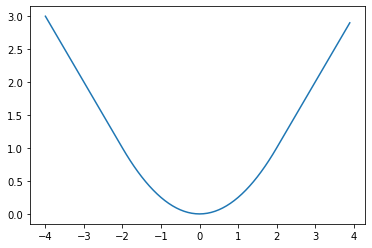

In [4]:
plt.plot(y_hat, l1smooth(y,y_hat,2))

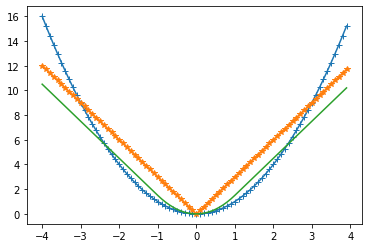

In [5]:
plt.plot(y_hat, mse(y,y_hat),'-+', 
         y_hat, 3 * l1(y,y_hat),'-*',
         y_hat, 3 * l1smooth(y,y_hat));

## Binary Cross Entropy


In [6]:
y = 0.5
y_hat = np.arange(0.01,1.0, 0.01)

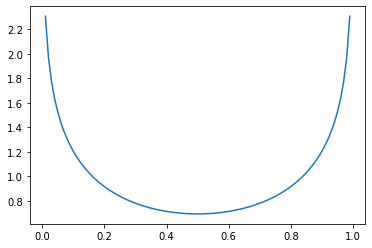

In [7]:
plt.plot(y_hat, bce(y,y_hat))

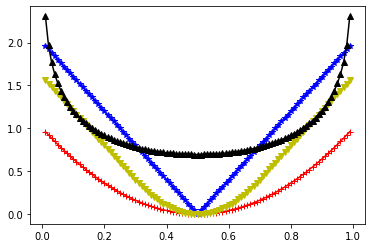

In [8]:
y = 0.5
plt.plot(y_hat, 4 * mse(y,y_hat),'r-+', 
         y_hat, 4 * l1(y,y_hat), 'b-*', 
         y_hat, 4 * l1smooth(y,y_hat,0.2), 'y-v',
         y_hat, bce(y,y_hat), 'k-^');